<a href="https://colab.research.google.com/github/estevaocardoso/projetos-estevao/blob/main/GETTING_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import basedosdados as bd

In [4]:
query = '''
SELECT ano, sigla_uf, id_municipio, bairro_revenda, cep_revenda, endereco_revenda, cnpj_revenda, nome_estabelecimento, bandeira_revenda, produto, data_coleta, preco_compra, preco_venda FROM `basedosdados.br_anp_precos_combustiveis.microdados`
WHERE sigla_uf IN ('DF', 'MG')

'''
df = bd.read_sql(query,
billing_project_id="extended-spark-302513")

Downloading: 100%|██████████| 1794935/1794935 [05:17<00:00, 5649.29rows/s]


# Definindo os postos de cartel no DF


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df['cnpj_revenda'] = df['cnpj_revenda'].str.replace(' ','', regex=True)
df['data_coleta'] = pd.to_datetime(df['data_coleta'])
data_filtered = df[df['produto'] == 'Gasolina']

Psotos do caertel do DF

"A investigação conjunta do Gaeco, do Conselho Administrativo de Defesa Econômica (Cade) e da Polícia Federal desvendou a atuação de, ao menos, 13 redes de postos no cartel de combustíveis do DF: Rede Cascol, Rede Gasolline, Rede JB, Rede Auto Shoping, Rede Planalto, Rede Braga, Rede São Roque, Rede Karserv, Rede Original, Rede Petros, Rede Jarjour, Posto dos Anões e Posto PB."

In [7]:
cascol = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Cascol', case=False)]
posto_dos_anoes = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Anoes', case=False)]
sao_roque = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Roque', case=False)]
auto_shopping = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Shopping', case=False)]
rede_jb = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Jb', case=False)]
postos_planalto = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Planalto', case=False)]
rede_braga = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Braga', case=False)]
rede_original = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Original', case=False)]
rede_karserv = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Karserv', case=False)]
rede_jarjour = data_filtered[data_filtered['nome_estabelecimento'].str.contains('Jarjour', case=False)]

#Não consegui identificar os postos PB e Gasolline


Todos os postos em um unico df

In [63]:
postos_DF = pd.concat([cascol, posto_dos_anoes, sao_roque, auto_shopping, rede_jb, postos_planalto, rede_braga, rede_original, rede_karserv, rede_jarjour], ignore_index=True)
postos_DF = postos_DF[postos_DF['ano'].astype(str).isin(['2011', '2012', '2013', '2014', '2015'])]
postos_DF

 

,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,produto,data_coleta,preco_compra,preco_venda
26,2011,DF,5300108,Asa Sul,70336000,"Plls Plls 303 Bloco A, S/N,",00306597000105,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2011-09-08,NaN,2.84
27,2011,DF,5300108,Asa Sul,70336000,"Plls Plls 303 Bloco A, S/N,",00306597000105,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2011-08-17,NaN,2.85
28,2011,DF,5300108,Asa Norte,70610640,Setor Setor De Garagens Oficiais Qda 4 Bloco A...,00306597000288,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2011-08-17,NaN,2.85
29,2011,DF,5300108,Asa Norte,70610640,Setor Setor De Garagens Oficiais Qda 4 Bloco A...,00306597000288,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2011-09-14,NaN,2.84
30,2011,DF,5300108,Asa Norte,70610640,Setor Setor De Garagens Oficiais Qda 4 Bloco A...,00306597000288,Cascol Combustiveis Para Veiculos Ltda,Petrobras Distribuidora S.A.,Gasolina,2011-08-31,NaN,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,2015,DF,5300108,Asa Norte,70844000,"Shcn Norte Sq 206, S/N, Bloco A Pag",00108670000207,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2015-08-05,NaN,3.51
9218,2015,DF,5300108,Taguatinga,72015585,"Csb 8, 44201,",00108670000126,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2015-08-05,NaN,3.50
9219,2015,DF,5300108,Taguatinga,72015585,"Csb 8, 44201,",00108670000126,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2015-07-07,NaN,3.50
9220,2015,DF,5300108,Taguatinga,72015585,"Csb 8, 44201,",00108670000126,Jarjour Veiculos E Petroleo Limitada,Branca,Gasolina,2015-07-01,NaN,3.50


# Definindo os postos de cartel em BH

caso do cartel nos mercados de distribuição e revenda de combustíveis na região metropolitana de Belo Horizonte e municípios vizinhos, em Minas Gerias(MG), nos anos de 2007 e 2008, condenado pelo Cade em 2019 (Processo Administrativo nº 08700.010769/2014-64). Tratou-se de um cartel hardcore na terceira região
metropolitana mais populosa do Brasil, tendo sido caracterizado pela combinação de preços entre os postos revendedores, bem como pela atuação das distribuidoras na prática de influência à adoção de comportamento uniforme por revendedores e pelo apoio de diretores do sindicato de revendedores local (Minaspetro). Além da combinação de preços de revenda para os consumidores finais, o cartel também contava com mecanismos de monitoramento e punição aos postos que não
praticassem o acordo. O processo foi instaurado, originalmente, em maio de 2007, pela antiga Secretaria de Direito Econômico (SDE), a partir de representação recebida da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP), reportando súbito e inexplicável aumento de preços no mercado de
revenda de gasolina comum na região em março de 2007 (Cade, 2018). Em 10/04/2019, o Tribunal do Cade condenou 27 postos de gasolina, duas distribuidoras e 12 pessoas físicas por prática de cartel e outras infrações à ordem econômica, aplicando, aproximadamente, R$ 156,9 milhões em multas ao todo.

Malan, F.F.H. and Resende, G.M., 2022. Documento de Trabalho 07/2022-Estimação de sobrepreço em cartéis: o caso do cartel de combustíveis na região metropolitana de Belo Horizonte/MG (No. 2022070). Conselho Administrativo de Defesa Econômica (Cade), Departamento de Estudos Econômicos.

In [9]:
df_bh = data_filtered[data_filtered['id_municipio'].isin(['3106200', '3118601', '3106705'])]
df_bh



,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,produto,data_coleta,preco_compra,preco_venda
1061,2011,MG,3106200,Borges,30001970,"Rodovia Br 262, S/N, Km 10",05009866000187,Posto Palha Verde Ltda,Branca,Gasolina,2011-08-24,NaN,2.999
1064,2011,MG,3106200,Borges,30001970,"Rodovia Br 262, S/N, Km 10",05009866000187,Posto Palha Verde Ltda,Cosan Lubrificantes,Gasolina,2011-10-11,NaN,2.799
1065,2011,MG,3106200,Borges,30001970,"Rodovia Br 262, S/N, Km 10",05009866000187,Posto Palha Verde Ltda,Branca,Gasolina,2011-10-04,NaN,2.799
1069,2011,MG,3106200,Olhos D'agua,30001970,"Rodovia Br 356, S/N, Km 7,5",25525650000181,Barrabela Auto Posto Ltda.,Raizen,Gasolina,2011-12-20,NaN,2.885
1071,2011,MG,3106200,Olhos D'agua,30001970,"Rodovia Br 356, S/N, Km 7,5",25525650000181,Barrabela Auto Posto Ltda.,Raizen,Gasolina,2011-07-06,NaN,2.997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787369,2023,MG,3106200,Dom Silverio,31985203,"Rodovia Anel Rodoviario Celso Mello Azevedo, 2...",00911111000150,Auto Posto Verona Eireli,Ipiranga,Gasolina,2023-08-23,NaN,5.550
1787370,2024,MG,3106200,Dom Silverio,31985203,"Rodovia Anel Rodoviario Celso Mello Azevedo, 2...",00911111000150,Auto Posto Verona Eireli,Ipiranga,Gasolina,2024-01-08,NaN,5.390
1787371,2023,MG,3106200,Dom Silverio,31985203,"Rodovia Anel Rodoviario Celso Mello Azevedo, 2...",00911111000150,Auto Posto Verona Eireli,Ipiranga,Gasolina,2023-08-16,NaN,5.850
1787372,2024,MG,3106200,Dom Silverio,31985203,"Rodovia Anel Rodoviario Celso Mello Azevedo, 2...",00911111000150,Auto Posto Verona Eireli,Ipiranga,Gasolina,2024-01-22,NaN,5.180


Lista de postos que formaram cartel em BH

In [10]:
mendonca = df_bh[df_bh['nome_estabelecimento'].str.contains('Mendonça', case=False)]
sion = df_bh[df_bh['nome_estabelecimento'].str.contains('Sion', case=False)]
posto_franca = df_bh[df_bh['cnpj_revenda']=='17408691000160']
Cassino = df_bh[df_bh['nome_estabelecimento'].str.contains('Cassino', case=False)]
brilhante = df_bh[df_bh['cnpj_revenda']=='25822974000181']
posto_cm = df_bh[df_bh['cnpj_revenda']=='04825376000196']
posto_delma = df_bh[df_bh['cnpj_revenda']=='19568294000180']
posto_donaclara = df_bh[df_bh['cnpj_revenda']=='20174314000118']
posto_floramar = df_bh[df_bh['cnpj_revenda']=='20159968000172']
posto_forum = df_bh[df_bh['cnpj_revenda']=='02879461000101']
posto_werneck = df_bh[df_bh['cnpj_revenda']=='25723479000115']
posto_franca = df_bh[df_bh['cnpj_revenda']=='03249077000198']
posto_jardins = df_bh[df_bh['cnpj_revenda']=='86433463000162']
posto_jessica = df_bh[df_bh['cnpj_revenda']=='00150462000195']
posto_amelia = df_bh[df_bh['cnpj_revenda']=='20358271000120']
posto_mario = df_bh[df_bh['cnpj_revenda']=='03665115000193']
posto_contagem = df_bh[df_bh['cnpj_revenda']=='21877899000103']
rede_petrobel = df_bh[df_bh['cnpj_revenda']=='17594821000104']
psoto_raja = df_bh[df_bh['cnpj_revenda']=='03400469000106']
psoto_barbara = df_bh[df_bh['cnpj_revenda']=='17387408000160']
posto_lucia = df_bh[df_bh['cnpj_revenda']=='17280959000120']
posto_vilarinho = df_bh[df_bh['cnpj_revenda']=='20160024000115']
posto_simone = df_bh[df_bh['cnpj_revenda']=='03193318000124']
posto_cca = df_bh[df_bh['cnpj_revenda']=='64438708000101']
posto_belvedere = df_bh[df_bh['cnpj_revenda']=='02898537000146']
posto_mangabeiras = df_bh[df_bh['cnpj_revenda']=='42969048000152']
posto_aeroporto = df_bh[df_bh['cnpj_revenda']=='16665259000191']
posto_buritis = df_bh[df_bh['cnpj_revenda']=='71281786000100']
posto_lubrimil = df_bh[df_bh['cnpj_revenda']=='42999250000127']
posto_grajau = df_bh[df_bh['cnpj_revenda']=='20828299000184']
posto_mustang = df_bh[df_bh['cnpj_revenda']=='17333899000167']
posto_ourofino = df_bh[df_bh['cnpj_revenda']=='17353756000117']
posto_parada = df_bh[df_bh['cnpj_revenda']=='71233852000177']

In [64]:
postosbh = [mendonca, sion, posto_franca, Cassino, brilhante, posto_cm, posto_delma, posto_donaclara,
       posto_floramar, posto_forum, posto_werneck, posto_franca, posto_jardins, posto_jessica,
       posto_amelia, posto_mario, posto_contagem, rede_petrobel, psoto_raja, psoto_barbara,
       posto_lucia, posto_vilarinho, posto_simone, posto_cca, posto_belvedere, posto_mangabeiras,
       posto_aeroporto, posto_buritis, posto_lubrimil, posto_grajau, posto_mustang, posto_ourofino,
       posto_parada]

postos_BH = pd.concat(postosbh)
postos_BH = postos_BH[postos_BH['ano'].astype(str).isin(['2006', '2007', '2008'])]
postos_BH


,ano,sigla_uf,id_municipio,bairro_revenda,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,produto,data_coleta,preco_compra,preco_venda
182222,2006,MG,3106200,Miramar,30620330,"Avenida Olinto Meireles, 2570,",18286757001040,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-04-26,2.0650,2.347
182224,2006,MG,3106200,Miramar,30620330,"Avenida Olinto Meireles, 2570,",18286757001040,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-05-11,2.2549,2.347
182934,2006,MG,3106200,Boa Vista,31060470,"Avenida Elisio De Brito, 600,",18286757000906,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-05-24,2.1890,2.397
182935,2006,MG,3106200,Boa Vista,31060470,"Avenida Elisio De Brito, 600,",18286757000906,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-06-07,2.1688,2.279
182938,2006,MG,3106200,Boa Vista,31060470,"Avenida Elisio De Brito, 600,",18286757000906,Mendonça & Cia Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-05-16,2.2000,2.399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618420,2006,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2006-04-26,2.1980,2.349
1665012,2008,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2008-05-28,2.1198,2.197
1665014,2008,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2008-04-07,NaN,2.257
1665015,2008,MG,3106200,Pompeia,30280020,"Avenida Dos Andradas, 3910,",71233852000177,Posto Parada Obrigatoria Ltda,Raizen,Gasolina,2008-01-30,2.1451,2.247


In [65]:
postos_BH['dummy_cartel'] = '1'
postos_DF['dummy_cartel'] = '1'


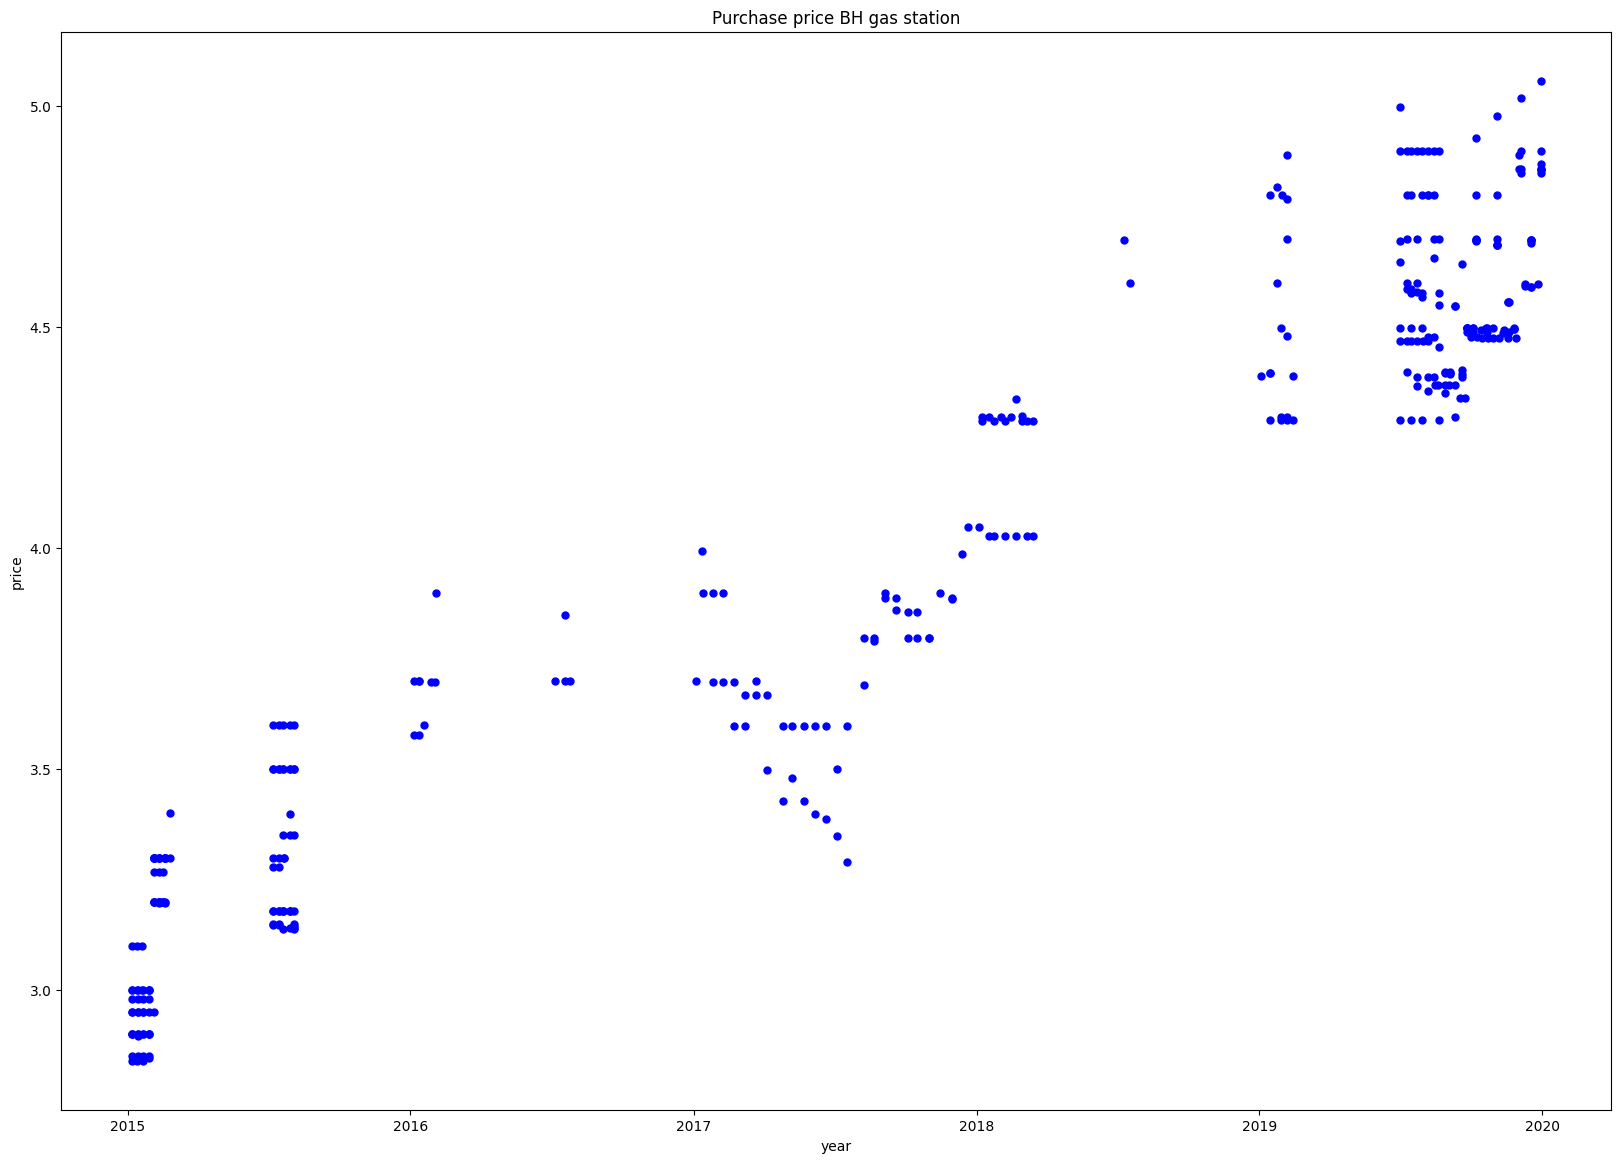

In [43]:
import matplotlib.pyplot as plt

dfpre = postos_BH[postos_BH['ano'].astype(str).isin(['2015', '2016', '2017', '2018', '2019'])]
dfadjust = dfpre.sort_values(by='data_coleta')
dfadjust['data_coleta'] = pd.to_datetime(dfadjust['data_coleta'])
plt.figure(figsize=(20,14))
plt.plot(dfadjust['data_coleta'], dfadjust['preco_venda'], marker='o', linestyle='', markersize=5, color = 'b')
plt.title('Purchase price BH gas station')
plt.xlabel('year')
plt.ylabel('price')
plt.grid(False)
plt.show()

# Criando o modelo com as bases de treinamento

In [1]:
base_treinamento = pd.concat([postos_DF, postos_BH])
base_treinamento.drop(['bairro_revenda'], axis=1, inplace=True)
base_treinamento

NameError: name 'pd' is not defined

In [59]:
base_treinamento.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'cep_revenda', 'endereco_revenda',
       'cnpj_revenda', 'nome_estabelecimento', 'bandeira_revenda', 'produto',
       'data_coleta', 'preco_venda', 'dummy_cartel'],
      dtype='object')

In [51]:
query = '''
SELECT ano, sigla_uf, id_municipio, cep_revenda, endereco_revenda, cnpj_revenda, nome_estabelecimento, bandeira_revenda, produto, data_coleta, preco_venda 
FROM `basedosdados.br_anp_precos_combustiveis.microdados`
WHERE produto = 'Gasolina'
'''

df = bd.read_sql(query, billing_project_id="extended-spark-302513")

Downloading: 100%|██████████| 3323444/3323444 [12:11<00:00, 4540.40rows/s]


In [53]:
base_teste = df

In [67]:
base_teste['dummy_cartel'] = '0'

In [69]:
base_teste

,ano,sigla_uf,id_municipio,cep_revenda,endereco_revenda,cnpj_revenda,nome_estabelecimento,bandeira_revenda,produto,data_coleta,preco_venda,dummy_cartel
0,2019,CE,2304400,60060150,"Avenida Historiador Raimundo Girão, 91, 0",00071655000150,Organização Neri De Petróleo Ltda,Petrobras Distribuidora S.A.,Gasolina,2019-10-16,4.579,0
1,2019,CE,2304400,60060150,"Avenida Historiador Raimundo Girão, 91, 0",00071655000150,Organização Neri De Petróleo Ltda,Petrobras Distribuidora S.A.,Gasolina,2019-07-24,4.240,0
2,2019,PI,2211001,64022050,"Avenida Henry Wall De Carvalho, 4207,",00109077000285,Postao Comercio E Transporte De Combustiveis E...,Ipiranga,Gasolina,2019-08-28,4.499,0
3,2019,MA,2105302,65900970,"Rua Circular 1, S/N, Lote 04 Quadra 73",00114061000180,Auto Posto Mix Ltda.,Branca,Gasolina,2019-07-31,4.439,0
4,2019,CE,2304400,60411260,"Avenida Deputado Oswaldo Studart, 888, A",00192116000170,J & L Comercio De Derivados De Petroleo Ltda,Petrobras Distribuidora S.A.,Gasolina,2019-01-22,4.159,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3323439,2006,RS,4317509,99800000,"Rodovia Rs 344, S/N, Km 98+750",88456751000168,Dornelles Combustíveis E Lubrificantes Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-02-08,2.770,0
3323440,2006,RS,4317509,99800000,"Rodovia Rs 344, S/N, Km 98+750",88456751000168,Dornelles Combustíveis E Lubrificantes Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-01-31,2.770,0
3323441,2006,RS,4317509,99800000,"Rodovia Rs 344, S/N, Km 98+750",88456751000168,Dornelles Combustíveis E Lubrificantes Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-04-19,2.778,0
3323442,2006,RS,4317509,99800000,"Rodovia Rs 344, S/N, Km 98+750",88456751000168,Dornelles Combustíveis E Lubrificantes Ltda,Petrobras Distribuidora S.A.,Gasolina,2006-05-04,2.770,0


In [ ]:
base_completa = base_teste.combine_first(base_treinamento)

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Selecionar características
X = base_completa[['preco_venda', 'dummy_cartel', 'endereco_revenda']]
y = base_completa['dummy_cartel']

# Codificar o endereço de cada posto com label encoding
label_encoder = LabelEncoder()
X['endereco_revenda_codificado'] = label_encoder.fit_transform(X['endereco_revenda'])

# Remover a coluna de endereço original
X.drop('endereco_revenda', axis=1, inplace=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 1.0


In [90]:
y

0          0
1          0
2          0
3          0
4          0
          ..
3323439    0
3323440    0
3323441    0
3323442    0
3323443    0
Name: dummy_cartel, Length: 3323447, dtype: object